# <p style="text-align: center;">COVID-19 World Vaccination Progress </p>

### Problem Definition

Covid-19 pandemic has been a challenge with over hundred million cases and over two million deaths around the globe. Wearing a mask and social distancing have become a new culture to limit the transmission of this deadly virus. While we hope to return back to our normal life from few years back, vaccination is the key, not only in one county or region but through out the entire world. Therefore it is necessary to track the vaccination progress of every country to save lives, limit spread, and move back to our old normal. In this project, I will track the vaccination progress around the globe based on the vaccine they use, total vaccinations, and daily vaccinations rate.

### Understanding Dataset

The vaccination progress dataset is obtained from Kaggle. The data contains the following information:

1. Country- this is the country for which the vaccination information is provided;
2. Country ISO Code - ISO code for the country;
3. Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. Total number of vaccinations - this is the absolute number of total immunizations in the country;
5. Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day - number of daily vaccination for that day and country;
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
14. Vaccines used in the country - total number of vaccines used in the country (up to date);
15. Source name - source of the information (national authority, international organization, local organization etc.);
16. Source website - website of the source of information

<u><b>Acknowledgement:</u></b><br>
    The data is made available in Kaggle by [Gabriel Preda](https://www.kaggle.com/gpreda). The dataset information provided above is as mentioned by the author.

### Libraries


In [55]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [143]:
df = pd.read_csv("./country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


### Exploratory Data Analysis

In [90]:
#Dataframe column characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         228 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  228 non-null    float64
 9   PERSONS_FULLY_VACCINATED              228 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       228 non-null    float64
 11  VACCINES_USED      

In [91]:
#rows and columns in the dataframe
df.shape


(229, 16)

In [92]:
#number of empty cells in the data frame
df.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       1
PERSONS_VACCINATED_1PLUS_DOSE            1
TOTAL_VACCINATIONS_PER100                1
PERSONS_VACCINATED_1PLUS_DOSE_PER100     1
PERSONS_FULLY_VACCINATED                 1
PERSONS_FULLY_VACCINATED_PER100          1
VACCINES_USED                            4
FIRST_VACCINE_DATE                      22
NUMBER_VACCINES_TYPES_USED               4
PERSONS_BOOSTER_ADD_DOSE                26
PERSONS_BOOSTER_ADD_DOSE_PER100         26
dtype: int64

In [94]:
#list of different names of countries in the dataset
df["COUNTRY"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', '

In [95]:
#list of vaccines names
df['VACCINES_USED'].unique()

array(['AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac',
       'AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac',
       'Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,SII - Covishield,Sinovac - CoronaVac',
       'Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfizer BioNTech - Comirnaty',
       'SII - Covishield',
       'AstraZeneca - Vaxzevria,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,Janssen - Ad26.COV 2-S,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Moderna - Spikev

In [97]:
#total number of countries
len(df['COUNTRY'].unique())


229

In [96]:
# total number of vaccines/vaccine combinations
len(df['VACCINES_USED'].unique())

118

### Data Visualization

In [114]:
#Daily Vaccination Rate Comparision
fig=go.Figure()
df1=df[df['COUNTRY']=='United States of America']
df2=df[df['COUNTRY']=='The United Kingdom']
df3=df[df['COUNTRY']=='Canada']
fig.add_trace(go.Barplot(x=df1.date,y=df1.daily_vaccinations,mode='lines+markers',name='US'))
fig.add_trace(go.Scatter(x=df2.date,y=df2.daily_vaccinations,mode='lines+markers',line=dict(color='firebrick',width=2),name='UK'))
fig.add_trace(go.Scatter(x=df3.date,y=df3.daily_vaccinations,mode='lines+markers',line=dict(dash='dashdot'),name='Canada'))

fig.update_layout(title = 'Daily Vaccination Rate Comparision in the US, UK & Canada',xaxis_title='Date',yaxis_title='Daily Vaccination' )

AttributeError: module 'plotly.graph_objects' has no attribute 'Barplot'

Text(0.5, 0, '\nVaccine Types\n\n')

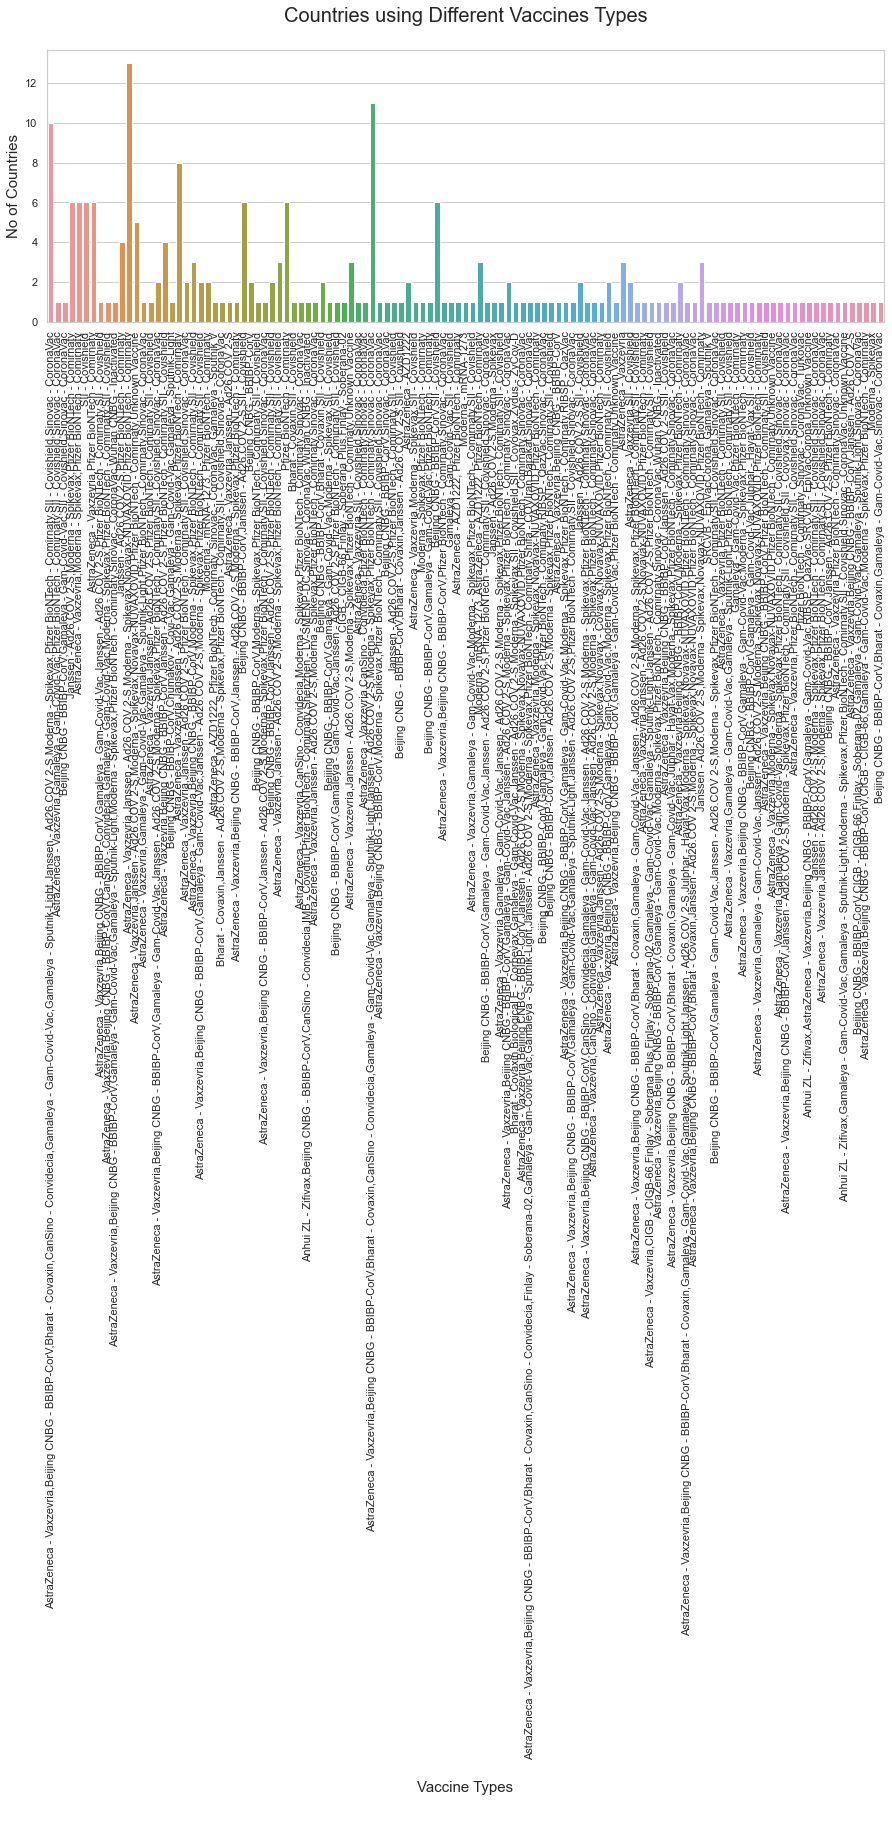

In [117]:
#Number of counties using different vaccine types/combinations
df.groupby(['COUNTRY'],sort=False, as_index=False)['VACCINES_USED'].first()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.set(style = 'whitegrid')
sns.countplot(x="VACCINES_USED", data=df.groupby(['COUNTRY'],sort=False, as_index=False)['VACCINES_USED'].first())
plt.title("Countries using Different Vaccines Types\n",size =20)
plt.ylabel("No of Countries",size=15)
plt.xlabel("\nVaccine Types\n\n",size=15)


In [118]:
#Finding Maximum number of people vaccinated in each country
vaccine = df.groupby(["COUNTRY","VACCINES_USED"])['TOTAL_VACCINATIONS','TOTAL_VACCINATIONS_PER100',].max().reset_index()
vaccine

,COUNTRY,VACCINES_USED,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100
0,Afghanistan,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",11977773.0,30.769
1,Albania,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2991576.0,104.000
2,Algeria,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",15267442.0,34.817
3,American Samoa,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",111316.0,201.670
4,Andorra,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",154320.0,199.700
...,...,...,...,...
220,Wallis and Futuna,Moderna - Spikevax,16782.0,149.226
221,Yemen,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",1065395.0,3.572
222,Zambia,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",9315275.0,50.671
223,Zimbabwe,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",12582801.0,84.659


In [119]:
#Map showing vaccine types and total vaccination
fig=px.scatter_geo(vaccine, locations='COUNTRY',locationmode='country names',color='VACCINES_USED', size='TOTAL_VACCINATIONS',hover_name='VACCINES_USED', projection='natural earth')
fig.update_layout(title='Vaccine Used by Countries with Total Vaccinated', legend_orientation='h',legend_title_text='Vaccine', autosize=False, width=800,height=600,)

In [120]:
#Visualization using choropleth
fig=px.choropleth(vaccine, locations='COUNTRY',locationmode = 'country names', color='VACCINES_USED')
fig.update_layout(title='Color representation of Vaccine Used',legend_orientation='h', legend_title_text='Vaccine', autosize=False, width=800,height=600,)

In [121]:
#Showing Total Vaccinated in TreeMap
fig=px.treemap(vaccine,path=['VACCINES_USED','COUNTRY'],values='TOTAL_VACCINATIONS')
fig.update_layout(title='Tree Map based on Total Vaccination')
fig

In [122]:
#Map based on Total Vaccination
fig=px.choropleth(vaccine, locations='COUNTRY', locationmode='country names', color='TOTAL_VACCINATIONS')
fig.update_layout(title='Total Vaccinations by Country')
fig

In [123]:
#Map based on vaccination per hundred
fig=px.choropleth(vaccine, locations='COUNTRY', locationmode='country names', color='TOTAL_VACCINATIONS_PER100')
fig.update_layout(title='Total Vaccinations Per Hundred by Country')
fig

In [124]:
#Countries with low total vaccination rate
adf=vaccine.sort_values(by='TOTAL_VACCINATIONS').head(9)
adf

,COUNTRY,VACCINES_USED,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100
160,Pitcairn Islands,AstraZeneca - Vaxzevria,138.0,276.000
148,Niue,Pfizer BioNTech - Comirnaty,4180.0,258.344
135,Montserrat,AstraZeneca - Vaxzevria,4564.0,91.298
202,Tokelau,Pfizer BioNTech - Comirnaty,4924.0,364.741
170,Saint Helena,AstraZeneca - AZD1222,7892.0,129.995
66,Falkland Islands (Malvinas),AstraZeneca - AZD1222,9390.0,269.595
220,Wallis and Futuna,Moderna - Spikevax,16782.0,149.226
140,Nauru,"AstraZeneca - Vaxzevria,SII - Covishield",24143.0,222.845
33,Burundi,Beijing CNBG - BBIBP-CorV,24236.0,0.204


In [125]:
#Bargraph showing low total vaccinated counties
fig= px.bar(adf, x= 'COUNTRY', y ='TOTAL_VACCINATIONS',color='VACCINES_USED')
fig.update_layout(title='Countries with Low Total Vaccination and Vaccine Used',legend_orientation='v')
fig

In [126]:
#Countries with high total vaccination rate
adf=vaccine.sort_values(by='TOTAL_VACCINATIONS',ascending=False).head(9)
adf

,COUNTRY,VACCINES_USED,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100
42,China,"Anhui ZL - Zifivax,Beijing CNBG - BBIBP-CorV,C...",3.457954e+09,235.029
93,India,"Bharat - Covaxin,Biological E - Corbevax,Gamal...",2.194144e+09,158.995
214,United States of America,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",6.201317e+08,187.349
28,Brazil,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",4.852550e+08,228.291
94,Indonesia,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",4.392110e+08,160.575
102,Japan,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Nov...",3.210372e+08,253.832
16,Bangladesh,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",3.176622e+08,192.886
153,Pakistan,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",3.130469e+08,141.719
219,Viet Nam,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2.602468e+08,267.362


In [127]:
#Bargraph showing high total vaccinated counties
fig= px.bar(adf, x= 'COUNTRY', y ='TOTAL_VACCINATIONS',color='VACCINES_USED')
fig.update_layout(title='Countries with High Total Vaccination and Vaccine Used',showlegend=False)
fig

In [129]:
#Total of each Vaccine used
vac = df.groupby("VACCINES_USED")['TOTAL_VACCINATIONS'].sum().astype(int).reset_index()
vac

,VACCINES_USED,TOTAL_VACCINATIONS
0,"Anhui ZL - Zifivax,AstraZeneca - Vaxzevria,Bei...",13514000
1,"Anhui ZL - Zifivax,Beijing CNBG - BBIBP-CorV,C...",-2147483648
2,"Anhui ZL - Zifivax,Gamaleya - Gam-Covid-Vac,Ga...",69218586
3,AstraZeneca - AZD1222,17282
4,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",119855
...,...,...
112,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",139739
113,Pfizer BioNTech - Comirnaty,665201
114,"Pfizer BioNTech - Comirnaty, Sinovac - CoronaV...",152405372
115,SII - Covishield,120034887


In [133]:
#Piechart showing total different combinations of vaccines used by countries
fig=px.pie(vac,values='TOTAL_VACCINATIONS',names='VACCINES_USED',labels={'VACCINES_USED':'Vaccine',' 	TOTAL_VACCINATIONS':'Total'})
fig.update_layout(title='Total vaccines given by Vaccines/Vaccines combinations',showlegend=False)
fig